# Modeling with Linear Regression 

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
data = pd.read_csv('Data/DirectMarketing_Cln_LR.csv')

print(data)




     Salary  Children  Catalogs  Old  Young  Gender  OwnHome  Married  \
0     47500         0         6    1      0       0        0        1   
1     63600         0         6    0      0       1        1        1   
2     13500         0        18    0      1       0        1        1   
3     85600         1        18    0      0       1        0        0   
4     68400         0        12    0      0       0        0        1   
..      ...       ...       ...  ...    ...     ...      ...      ...   
995   19400         1        18    0      1       0        1        1   
996   40500         1        18    0      0       1        1        1   
997   44800         0        24    1      0       1        0        1   
998   79000         2        18    0      0       1        0        0   
999   53600         1        24    0      1       1        1        0   

     Distance  AmountSpent  
0           1          755  
1           0         1318  
2           0          296  
3      

In [21]:
print(data.columns)

Index(['Salary', 'Children', 'Catalogs', 'Old', 'Young', 'Gender', 'OwnHome',
       'Married', 'Distance', 'AmountSpent'],
      dtype='object')


In [25]:
#seperating independent and dependent variables
X = data.drop(['AmountSpent'], axis=1).values
y = data['AmountSpent'].values
print(X,y)

[[47500     0     6 ...     0     1     1]
 [63600     0     6 ...     1     1     0]
 [13500     0    18 ...     1     1     0]
 ...
 [44800     0    24 ...     0     1     0]
 [79000     2    18 ...     0     0     0]
 [53600     1    24 ...     1     0     0]] [ 755 1318  296 2436 1304  495  782 1155  158 3034  927 2065  704 2136
 5564 2766 3010 1956  542  410  194  827 2328  808  521  655  707 2075
  769  774  573 2082 2446 2636 2226  183 1595  584  982  576  410 3082
 2437 3655  844 2510  983 1215 2000 2574 1116 3604 3360  530  906 2764
 1263 1084 1051  614  704  449  136  468  565 1310 2595  358 1424 4182
  468 2924  964  615   38 1006  307 1648  220  280 1647  704  920  258
 1821 1587  528  867  643  107 1513 4558  741  805  470  278 1093  470
 1856 1688  708 1753 3044  855  550 2265 2452 1184 2150 1575 1822 1153
 1877  450  873  209 1472 1702 1857  451  344 1492 2098 3505  127  436
 2524  189  607  202 1554  633  176 3079 2038 1203  326  235 3688  332
  143 3104 2339  123  879 

## Perform Principle Component Analysis to determine which feature(s) to keep

In [26]:
# Attempt at feature reduction using PCA Before feature scaling
#Load libraries
#from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.1, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", features_pca.shape[1])
print("selected of features:", features_pca)


Original number of features: 9
Reduced number of features: 1
selected of features: [[-2.81023382e-01]
 [ 2.44840036e-01]
 [-1.39154239e+00]
 [ 9.63411183e-01]
 [ 4.01619200e-01]
 [-8.39549124e-01]
 [-2.61425980e-01]
 [ 4.01619208e-01]
 [-1.37309155e-01]
 [ 8.03365795e-01]
 [-4.05140206e-01]
 [ 1.81916408e+00]
 [-3.92075260e-01]
 [ 1.80609914e+00]
 [ 1.76037190e+00]
 [ 8.81755365e-01]
 [ 8.71956683e-01]
 [ 1.11039164e+00]
 [-5.71718051e-01]
 [-1.37521123e+00]
 [-1.36541254e+00]
 [-2.05900029e-01]
 [ 1.33788150e-01]
 [-4.11672671e-01]
 [-4.70464862e-01]
 [ 1.18224875e+00]
 [ 2.18710177e-01]
 [ 5.48599666e-01]
 [ 3.52625714e-01]
 [-1.12371133e+00]
 [-5.35789502e-01]
 [ 5.25736032e-01]
 [ 1.03200207e+00]
 [ 1.56766419e+00]
 [ 3.78755573e-01]
 [-9.50601026e-01]
 [ 2.61171222e-01]
 [-2.97354536e-01]
 [-4.73731078e-01]
 [-1.17597104e+00]
 [ 2.57904974e-01]
 [ 1.32922922e+00]
 [ 6.56385344e-01]
 [ 8.29495654e-01]
 [-2.12432493e-01]
 [ 1.80936538e+00]
 [ 7.05378807e-01]
 [ 9.13271289e-02]
 [ 2.

## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
print(X_train)

[[39600     0    12 ...     0     1     0]
 [17600     0     6 ...     1     1     0]
 [33200     1     6 ...     1     1     0]
 ...
 [96500     0    24 ...     0     0     0]
 [68700     0    24 ...     1     0     0]
 [47000     1    12 ...     1     1     0]]


In [29]:
print(X_test)

[[52400     0    18 ...     1     1     0]
 [92400     1     6 ...     1     0     1]
 [50100     1    18 ...     0     1     1]
 ...
 [38200     0     6 ...     1     0     0]
 [60500     3    12 ...     0     0     0]
 [26700     1    12 ...     1     1     0]]


In [30]:
print(y_train)

[ 610  273  320 1215  491  984  410 3916 3398 1932  205 1553  517 1694
  556  858  301  830  850  704 2502 1804  735 1271  239 1861 1184  563
  405  225 1688  222 2290  268  989  548  193  227 1161  704  981 1587
  472  836  365  307  421 1631 1203 1213 1615 2316  143  348 1073  163
  869 2844 1418 1481 1492 1521  292 3010  747 1140  859 1474 1473 2452
  500  808  690 4182  403 2340 2034 1025  624  607 1001 2145   38  856
 1608 1634 1138 1822  466  700  414 1813 2840 1325 2004 1029  865  449
  297   79  639 1009 1087  541  486 1156  472 2038  535  421 2098 1084
 2104 1512 2644 1041  731  983  847  871  645 1102 1786 2492  755  858
 1431 2595 5151  438 2177 2784  659 1085  349 4984 1926  536  458  381
  424 1853  210  883 1634  342 1237  770  759 1476  741  873 1651 1800
  307  514 3671  176  661 3537 1051  183 2243 1081 1344  410  107 1093
  157 1424  932  587  332  748  486 1857 1850 1024 1351  657  975  880
  613 1042  865 5564 1227  920  166 1307  534  636  643 1255  719  780
 1280 

In [31]:
print(y_test)

[ 857 2191 1071  983 1485 1634  917 1120  821 2574 1437 2339 2279  616
 1047 3079  550  782  909 5878 1355 1781 1398  417  314  451 2150  863
 1322  617  791 1905  197 1021 3941 1308  220 2610  788  160  947 1011
 1513 1753  470  619  260 3082 1699  384  654 2226 1594  183 1081  567
 1197  630 1666 1384 2070  690  881 1757  824 2904 2710   65  245 1956
  216 2224 1512  606  173 1310  708 1523  915  422 1789  705  907  445
  529  941  409  642  794  170  358 2681  753 1685  192  841  164  191
 2183  581 1012 2136 1473  474  788  167 3293 1414 1560  395  233  954
  422  614  929 1582  163 2632  344  195  473 2321 2436  202  902 2935
 3168 2561 1821 1062  586 1654  206  296 1417 1320 2523 2318 3063 1500
  615 1702 1773 1944 1153  371 2090  269 2107  491  448  510  158 3126
 1263 2838 2840 1408 1821  774 3237  202  436 1611 2258  418 1165  919
 1566 1298 1721  704  438 1699  392 1985 1457  968  172 2177 5830 1116
  550  737   47 1186 3491 1583  322 1692  180 1332 2479 2491  754 1985
  757 

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
print(X_train)

[[-0.52755785 -0.88168494 -0.39562169 ... -0.99252792  0.99252792
  -0.65075921]
 [-1.25022859 -0.88168494 -1.30249089 ...  1.00752834  0.99252792
  -0.65075921]
 [-0.73778934  0.06636338 -1.30249089 ...  1.00752834  0.99252792
  -0.65075921]
 ...
 [ 1.34153147 -0.88168494  1.41811671 ... -0.99252792 -1.00752834
  -0.65075921]
 [ 0.42833844 -0.88168494  1.41811671 ...  1.00752834 -1.00752834
  -0.65075921]
 [-0.28447769  0.06636338 -0.39562169 ...  1.00752834  0.99252792
  -0.65075921]]


In [34]:
print(X_test)


[[-0.10709488 -0.88168494  0.51124751 ...  1.00752834  0.99252792
  -0.65075921]
 [ 1.20685192  0.06636338 -1.30249089 ...  1.00752834 -1.00752834
   1.5366667 ]
 [-0.18264682  0.06636338  0.51124751 ... -0.99252792  0.99252792
   1.5366667 ]
 ...
 [-0.57354599 -0.88168494 -1.30249089 ...  1.00752834 -1.00752834
  -0.65075921]
 [ 0.15897935  1.96246002 -0.39562169 ... -0.99252792 -1.00752834
  -0.65075921]
 [-0.95130569  0.06636338 -0.39562169 ...  1.00752834  0.99252792
  -0.65075921]]


## Training the Multiple Linear Regression model on the Training set

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.7116840833488567
intercept: 1203.845
slope: [ 656.57093037 -243.50236366  277.64981606    8.34886099   41.6982116
  -13.83389792  -28.37283187   20.89161662  218.61659718]


## Coefficient of determination
#### The $R^2$ value of 0.71 or confidence interval of 71% 


## Intercept
#### Intercept of 1203.845 is the amount that would be spent if all independent variables were zero. 

## Slope
#### For each predictor 'Salary', 'Children', 'Catalogs', 'Old', 'Young', 'Gender', 'OwnHome','Married', 'Distance',  if their value goes up by one, 'AmountSpent', will be their respective slope in  [656.57093037 -243.50236366  277.64981606    8.34886099   41.6982116 -13.83389792  -28.37283187   20.89161662  218.61659718]. For example, for every one dollar increase in salary, amount spent will increase by 656.57, and decrease by 243.50 for every added child. It is worth noting the variations of increase/decrease among features.
       

In [44]:
X = features_pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.4742229075265857
intercept: 1203.845
slope: [659.2073121]


#### Note that rediced dimentianility lowered $R^2$ to 47%. Intercept did not change and 1 dollar increase in salary added 659 to amount spent which is only 3 dollars more than all features included in the model.

In [47]:
X = data[['Salary', 'Children', 'Catalogs','Gender']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.6597996191982207
intercept: 1203.845
slope: [ 614.7067424  -240.54417011  313.69381329  -16.59658213]


## Predicting the Test set results

In [50]:
y_pred = model.predict(X_test)

## Evaluating results

In [51]:
Amt_Spnt_Test = y_test.reshape(len(y_test),1)
Amt_spnt_Pred = y_pred.reshape(len(y_pred),1)

In [52]:
data = {'TestData': y_test, 'PredData': y_pred}
df = pd.DataFrame(data=data)
df.head()

,TestData,PredData
0,857,1493.792637
1,2191,1537.672161
2,1071,1219.302853
3,983,1696.369370
4,1485,2319.889819


In [53]:
df['Difference'] = df['PredData'] - df['TestData']
df.head(10)

,TestData,PredData,Difference
0,857,1493.792637,636.792637
1,2191,1537.672161,-653.327839
2,1071,1219.302853,148.302853
3,983,1696.369370,713.369370
4,1485,2319.889819,834.889819
5,1634,1247.446590,-386.553410
6,917,1592.502745,675.502745
7,1120,1292.523392,172.523392
8,821,765.440441,-55.559559
9,2574,2207.360014,-366.639986


## Visualising results



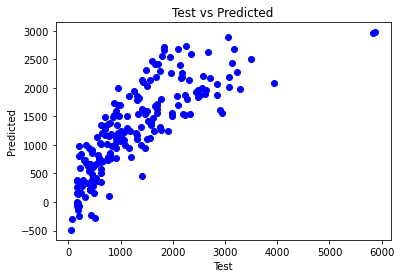

In [54]:
plt.scatter(df['TestData'], df['PredData'], color = 'blue')
plt.title('Test vs Predicted')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()